In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

585

In [8]:
#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
#Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | kapaa
Processing Record 2 of Set 12 | hobart
Processing Record 3 of Set 12 | albany
Processing Record 4 of Set 12 | labuhan
Processing Record 5 of Set 12 | rikitea
Processing Record 6 of Set 12 | hamilton
Processing Record 7 of Set 12 | atuona
Processing Record 8 of Set 12 | yumen
Processing Record 9 of Set 12 | yining
Processing Record 10 of Set 12 | aksu
Processing Record 11 of Set 12 | punta arenas
Processing Record 12 of Set 12 | busselton
Processing Record 13 of Set 12 | maragogi
Processing Record 14 of Set 12 | alyangula
Processing Record 15 of Set 12 | halifax
Processing Record 16 of Set 12 | zhigansk
Processing Record 17 of Set 12 | mar del plata
Processing Record 18 of Set 12 | dunedin
Processing Record 19 of Set 12 | byron bay
Processing Record 20 of Set 12 | ushuaia
Processing Record 21 of Set 12 | silver city
Processing Record 22 of Set 12 | sibolga
Processing Record 23 of Set 12 | straumen
Processing Record 24 of Set 12 | port alfred
Process

Processing Record 37 of Set 15 | gawler
Processing Record 38 of Set 15 | gat
Processing Record 39 of Set 15 | qobustan
Processing Record 40 of Set 15 | bandundu
Processing Record 41 of Set 15 | richards bay
Processing Record 42 of Set 15 | goma
Processing Record 43 of Set 15 | filingue
Processing Record 44 of Set 15 | ucluelet
Processing Record 45 of Set 15 | hunza
City not found. Skipping...
Processing Record 46 of Set 15 | monteagudo
Processing Record 47 of Set 15 | hermanus
Processing Record 48 of Set 15 | mattru
Processing Record 49 of Set 15 | kamiiso
Processing Record 50 of Set 15 | saleaula
City not found. Skipping...
Processing Record 1 of Set 16 | mana
Processing Record 2 of Set 16 | aksarka
Processing Record 3 of Set 16 | honningsvag
Processing Record 4 of Set 16 | samarkand
Processing Record 5 of Set 16 | amderma
City not found. Skipping...
Processing Record 6 of Set 16 | hagenow
Processing Record 7 of Set 16 | yerbogachen
Processing Record 8 of Set 16 | santa fe
Processing 

Processing Record 22 of Set 19 | baghdad
Processing Record 23 of Set 19 | nalut
Processing Record 24 of Set 19 | piranhas
Processing Record 25 of Set 19 | kichera
Processing Record 26 of Set 19 | sobolevo
Processing Record 27 of Set 19 | barra do garcas
Processing Record 28 of Set 19 | geraldton
Processing Record 29 of Set 19 | patnos
Processing Record 30 of Set 19 | adet
Processing Record 31 of Set 19 | qarayeri
Processing Record 32 of Set 19 | vung tau
Processing Record 33 of Set 19 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 19 | riohacha
Processing Record 35 of Set 19 | takoradi
Processing Record 36 of Set 19 | coahuayana
Processing Record 37 of Set 19 | lagos
Processing Record 38 of Set 19 | awjilah
Processing Record 39 of Set 19 | necochea
Processing Record 40 of Set 19 | grootfontein
Processing Record 41 of Set 19 | banff
Processing Record 42 of Set 19 | hasaki
Processing Record 43 of Set 19 | port blair
Processing Record 44 of Set 19 | griffith
Process

Processing Record 6 of Set 23 | general roca
Processing Record 7 of Set 23 | kurumkan
Processing Record 8 of Set 23 | vao
Processing Record 9 of Set 23 | mitu
Processing Record 10 of Set 23 | caxito
Processing Record 11 of Set 23 | eldikan
City not found. Skipping...
Processing Record 12 of Set 23 | kuching
Processing Record 13 of Set 23 | akyab
Processing Record 14 of Set 23 | bolshiye uki
City not found. Skipping...
Processing Record 15 of Set 23 | kyabe
Processing Record 16 of Set 23 | la rochelle
Processing Record 17 of Set 23 | tsiroanomandidy
Processing Record 18 of Set 23 | ambilobe
Processing Record 19 of Set 23 | blackwater
Processing Record 20 of Set 23 | bulgan
Processing Record 21 of Set 23 | tvoroyri
Processing Record 22 of Set 23 | kyritz
Processing Record 23 of Set 23 | khuzhir
Processing Record 24 of Set 23 | ambunti
Processing Record 25 of Set 23 | ust-kamchatsk
City not found. Skipping...
Processing Record 26 of Set 23 | laguna
Processing Record 27 of Set 23 | barranc

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,73.72,86,75,16.11,US,2022-05-12 15:19:56
1,Hobart,-42.8794,147.3294,50.05,91,78,6.91,AU,2022-05-12 15:19:22
2,Albany,42.6001,-73.9662,76.73,27,7,1.99,US,2022-05-12 15:15:06
3,Labuhan,-6.8844,112.2051,80.31,84,42,0.27,ID,2022-05-12 15:19:57
4,Rikitea,-23.1203,-134.9692,77.00,75,29,20.33,PF,2022-05-12 15:17:31
5,Hamilton,39.1834,-84.5333,78.75,42,40,10.36,US,2022-05-12 15:15:05
6,Atuona,-9.8000,-139.0333,78.10,79,77,23.98,PF,2022-05-12 15:19:57
7,Yumen,40.2833,97.2000,54.18,20,79,30.06,CN,2022-05-12 15:19:58
8,Yining,29.0361,114.5636,65.39,98,100,1.57,CN,2022-05-12 15:19:58
9,Aksu,41.1231,80.2644,72.99,31,76,7.07,CN,2022-05-12 15:19:59


In [14]:
city_data_df_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df =city_data_df[city_data_df_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-05-12 15:19:56,22.0752,-159.3190,73.72,86,75,16.11
1,Hobart,AU,2022-05-12 15:19:22,-42.8794,147.3294,50.05,91,78,6.91
2,Albany,US,2022-05-12 15:15:06,42.6001,-73.9662,76.73,27,7,1.99
3,Labuhan,ID,2022-05-12 15:19:57,-6.8844,112.2051,80.31,84,42,0.27
4,Rikitea,PF,2022-05-12 15:17:31,-23.1203,-134.9692,77.00,75,29,20.33


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

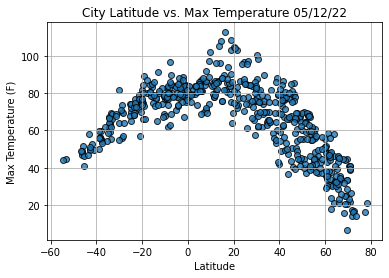

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

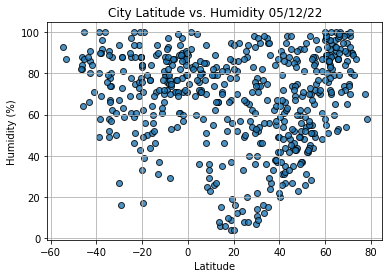

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

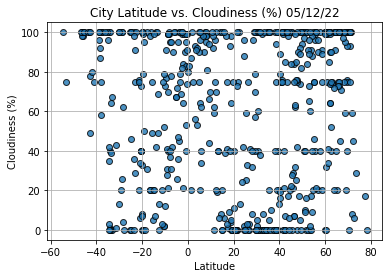

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

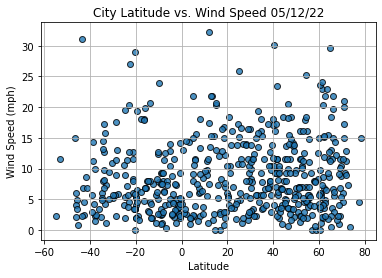

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Alyangula
Country                        AU
Date          2022-05-12 15:20:00
Lat                      -13.8483
Lng                      136.4192
Max Temp                    76.73
Humidity                       71
Cloudiness                     42
Wind Speed                   4.47
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-05-12 15:19:56,22.0752,-159.3190,73.72,86,75,16.11
2,Albany,US,2022-05-12 15:15:06,42.6001,-73.9662,76.73,27,7,1.99
5,Hamilton,US,2022-05-12 15:15:05,39.1834,-84.5333,78.75,42,40,10.36
7,Yumen,CN,2022-05-12 15:19:58,40.2833,97.2000,54.18,20,79,30.06
8,Yining,CN,2022-05-12 15:19:58,29.0361,114.5636,65.39,98,100,1.57


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

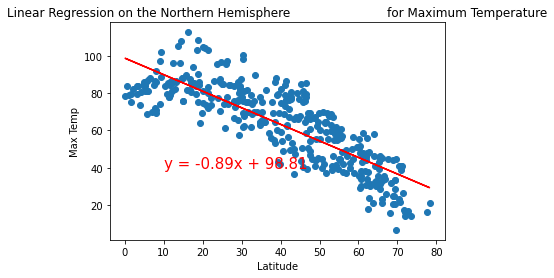

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

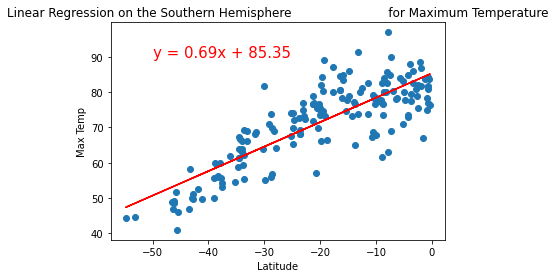

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

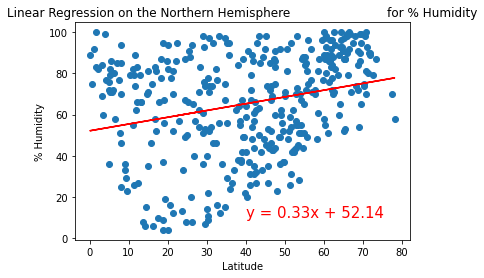

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

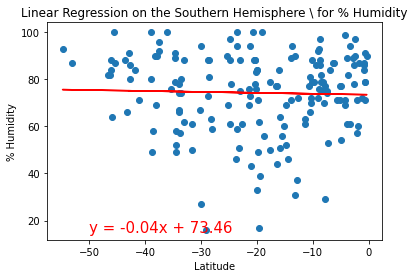

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,15))

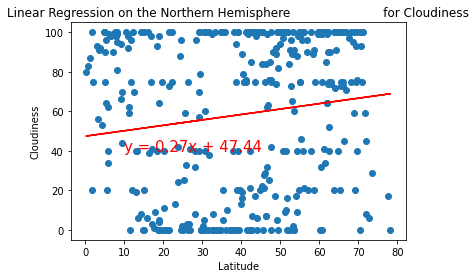

In [30]:
# Linear regression on the Northern Hemi
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Cloudiness','Cloudiness',(10,40))

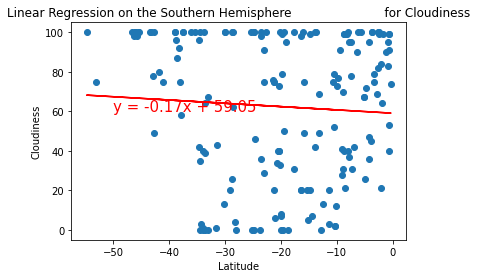

In [31]:
# Linear regression on the Northern Hemi
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values,y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Cloudiness','Cloudiness',(-50,60))

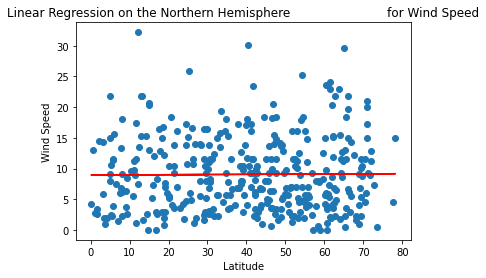

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

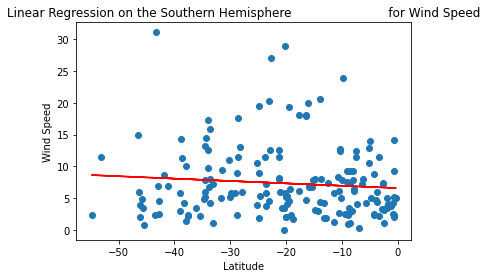

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))